# Plotting Timeseries for different Transport files from Observational Data
*Akira Di Sandro, 6/23/20*
<br>
In this notebook, I will be plotting time series of transport in different files within the 'T' dataset from Marion's mooring data.

## 1.  Import packages and Load in data

In [23]:
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import random

In [4]:
#!python
#!/usr/bin/env python
from scipy.io import loadmat
x = loadmat('allTransport_SolomonStrait.mat')
# one-liner to read a single variable
#lon = loadmat('test.mat')['lon']

## 2. Convert time stamps into legible and usable ones

### a. Legible to humans

In [11]:
datenums = x['time'][0]
# this line below reads matlab datenums and returns datetime in human legible format
timestamps = pd.to_datetime(datenums-719529, unit='D')

### b. Timestamps in vector format for python

In [13]:
# this code reads matlab datenums and returns it in a datetime vector. 
def matlab2datetime(matlab_datenum):
    day = dt.datetime.fromordinal(int(matlab_datenum))
    dayfrac = dt.timedelta(days=matlab_datenum%1) - dt.timedelta(days = 366)
    return day + dayfrac

In [14]:
py_dt = []

for time in datenums:
    py_dt = np.concatenate([py_dt, [matlab2datetime(int(time))]])
#py_dt

## 3. Plot Transport timeseries

In [19]:
# create a function that takes in the dataset, selected array and time stamps to return a plot
def plot_trans(ds, arr, times):
    transport = ds[arr]
    fig, ax = plt.subplots(figsize=(14,8))
    ax.set_ylabel('Transport (Sv)')
    ax.set_xlabel('Time')
    ax.plot(times, transport)
    ax.set_xlim(times[0], times[-1])
    ax.grid(True)
    plt.show()

In [17]:
len(x['T'])

48

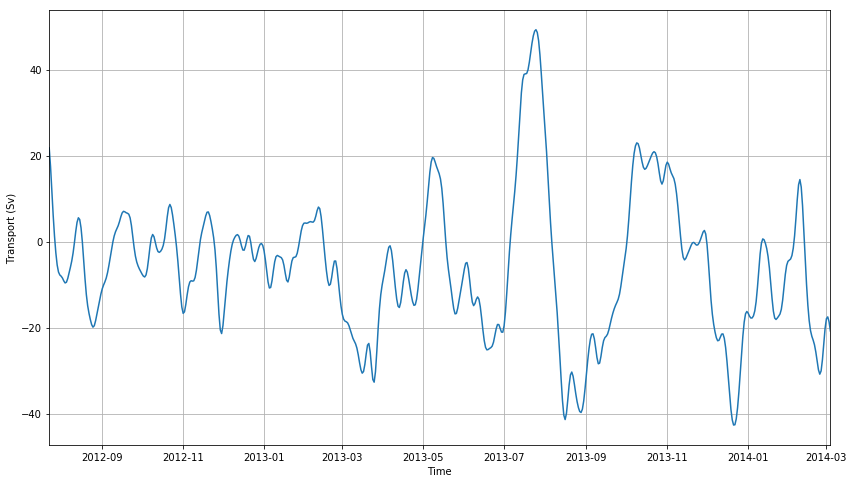

In [20]:
trans2_plot = plot_trans(x['T'], 1, py_dt)

In [24]:
# make function that prints random T array and plots it
def rand_plot(ds, times):
    num = random.randint(0, 47)
    print(num)
    plot_trans(ds, num, times)

19


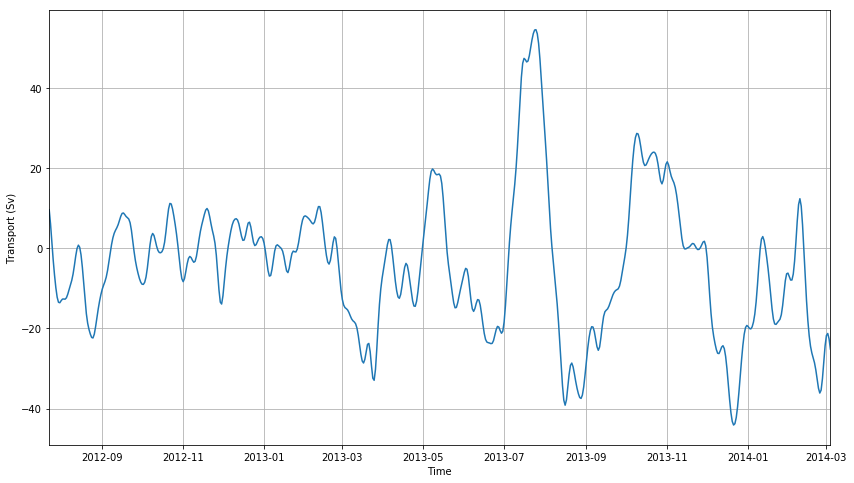

In [27]:
rand_plot(x['T'], py_dt)